In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("original_dataset.csv")

df_info = df.info()
df_head = df.head()
df_description = df.describe(include="all")

df_info, df_head, df_description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

(None,
    Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
 0             23          84                  Low                High   
 1             19          64                  Low              Medium   
 2             24          98               Medium              Medium   
 3             29          89                  Low              Medium   
 4             19          92               Medium              Medium   
 
   Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
 0                         No            7               73              Low   
 1                         No            8               59              Low   
 2                        Yes            7               91           Medium   
 3                        Yes            8               98           Medium   
 4                        Yes            6               65           Medium   
 
   Internet_Access  Tutoring_Sessions Family_Income Teacher_Quali

## Numerical Values
* Hours_Studied
* Attendance
* Sleep_Hours
* Previous_Scores
* Tutoring_Sessions
* Physical_Activity
* Exam_Score

## Categorical Values
* Parental_Involvement
* Access_to_Resources
* Extracurricular_Activities
* Motivation_Level
* Internet_Access
* Family_Income
* Teacher_Quality
* School_Type
* Peer_Influence
* Learning_Disabilities
* Parental_Education_Level
* Distance_from_Home
* Gender

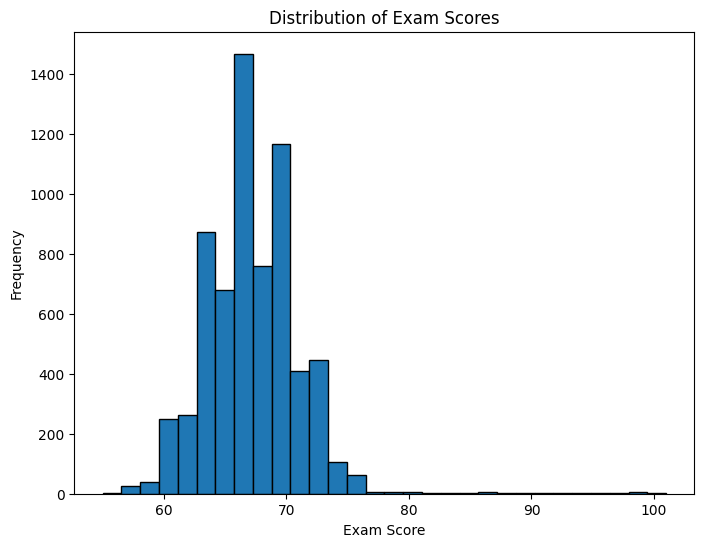

In [5]:
# Plot 1: Histogram of Exam Score
plt.figure(figsize=(8, 6))
plt.hist(df['Exam_Score'], bins=30, edgecolor='black')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

## Plot 1 Insights
* Fairly normal with a slight right skew
* Most of the scores are between 60-75
* There are a few values slightly above 100 which may need to be verified

/var/folders/t0/hzg53ff9319g3z7q6s1nj6fc0000gn/T/ipykernel_25264/1574072085.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=categories)


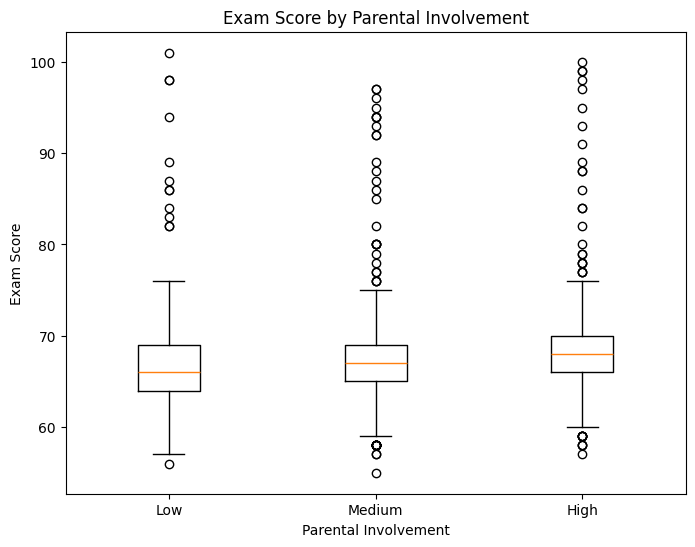

In [6]:
# Plot 2: Box Plot of Exam Score by Parental Involvement
plt.figure(figsize=(8,6))
categories = df['Parental_Involvement'].dropna().unique()
data_to_plot = [df[df['Parental_Involvement'] == cat]['Exam_Score'] for cat in categories]

plt.boxplot(data_to_plot, labels=categories)
plt.title('Exam Score by Parental Involvement')
plt.xlabel('Parental Involvement')
plt.ylabel('Exam Score')
plt.show()

## Plot 2 Insights
* Students with "High" parental involvement tend to score better
* "Low" involvement shows greater score variability and lower medians

## Cleaning Dataset

In [7]:
# Represent any missing cateogrical values with the mode
df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace=True)
df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0], inplace=True)
df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0], inplace=True)

# Cap Exam_Score at 100 in case any value exceeds it
df['Exam_Score'] = df['Exam_Score'].apply(lambda x: min(x, 100))

# Save Cleaned Dataset
file_path = "cleaned_dataset_temp.csv"
df.to_csv(file_path, index=False)

/var/folders/t0/hzg53ff9319g3z7q6s1nj6fc0000gn/T/ipykernel_25264/271599564.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace=True)
/var/folders/t0/hzg53ff9319g3z7q6s1nj6fc0000gn/T/ipykernel_25264/271599564.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which w